In [119]:
import os, sys, glob
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

%matplotlib notebook
import matplotlib.pyplot as plt

# Problem 1


In [20]:
fn_prob = os.path.join(os.getcwd(), 'p1a_input.txt')


if os.path.exists(fn_prob):
    print('file is good')
    data = np.loadtxt(open(fn_prob, 'r'))
answer1a = np.sum(np.diff(data)>0)
print(answer1a)

nd = len(data)

answer1b = np.sum(np.diff(sigpro.fftconvolve(np.ones(3), data)[:nd-2])>0)
print(answer1b)

dd = np.zeros(nd+2, dtype = 'int')
dd[2:] = data
d2 = scpla.hankel(data[:3], data[2:])
print(d2.shape)
answer1b = np.sum(np.diff(np.sum(d2, axis=0))>0)

print(answer1b)

file is good
1754
1793
(3, 1998)
1789


# Problem 2

In [25]:
fn_prob = os.path.join(os.getcwd(), 'p2a_input.txt')

depth = 0
pos = 0
with open(fn_prob) as fid:
    fid.seek(0, 2)
    nbend = fid.tell()
    fid.seek(0)
    
    while fid.tell()<nbend:
        ln = fid.readline()
        lnsplit = ln.split(' ')
        if lnsplit[0] == 'forward':
            pos += int(lnsplit[1], base=10)
        elif lnsplit[0] == 'up':
            depth -= int(lnsplit[1], base=10)
        elif lnsplit[0] == 'down':
            depth += int(lnsplit[1], base=10)
print('Final depth {}, position {}, product {}'.format(depth, pos, pos*depth))


depth = 0
pos = 0
aim = 0
with open(fn_prob) as fid:
    fid.seek(0, 2)
    nbend = fid.tell()
    fid.seek(0)
    
    while fid.tell()<nbend:
        ln = fid.readline()
        if len(ln) == 0:
            continue
        lnsplit = ln.split(' ')
        numb = int(lnsplit[1], base=10)
        if lnsplit[0] == 'forward':
            pos += numb
            depth += aim * numb
        elif lnsplit[0] == 'up':
            aim -= numb
        elif lnsplit[0] == 'down':
            aim += numb
print('Final depth {}, position {}, aim {}, product {}'.format(depth, pos, aim, pos*depth))


Final depth 1051, position 2162, product 2272262
Final depth 987457, position 2162, aim 1051, product 2134882034


# Problem 3

In [50]:
def trimlist(list_in, idx, most=True):
    nd = len(list_in)
    psum = 0
    for d in list_in:
        psum += int(d[idx], base=10)
                            
    if psum >= nd/2:
        keepval = 1
    else:
         keepval = 0
            
    if not most:
        keepval = 1-keepval
    list_out = []
    for d in list_in:
        if int(d[idx], base=10) == keepval:
            list_out.append(d)
    return list_out

            


p3data = ['00100','11110','10110','10111','10101','01111',
            '00111','11100','10000','11001','00010','01010']
p3data = []
fn_prob = os.path.join(os.getcwd(), 'p3a_input.txt')

with open(fn_prob) as fid:
    fid.seek(0, 2)
    nbend = fid.tell()
    fid.seek(0)
    
    while fid.tell()<nbend:
        ln = fid.readline()
        p3data.append(ln.strip())

nd = len(p3data)
psum = np.zeros(len(p3data[0]))
for d in p3data:
    for idig, dig in enumerate(d):
        psum[idig] += int(dig, base=10)
binval = (psum>nd/2).astype('int')
print(binval)
gamval = 0
epval = 0
for ibt, bt in enumerate(binval[::-1]):
    gamval += bt*(2**ibt)
    epval += (1-bt)*(2**ibt)
    
print('binary {}, gamma {}, epsillon {}, product {}'.format(binval, gamval, epval, gamval*epval))

o2list = p3data.copy()
co2list = p3data.copy()
cto2 = 0
ctco2 = 0
while len(o2list) > 1:
    
    o2list = trimlist(o2list, cto2, most=True)
    cto2 += 1
print(o2list)

while len(co2list) > 1:
    
    co2list = trimlist(co2list, ctco2, most=False)
    ctco2 += 1
print(co2list)

o2val = int(o2list[0], base=2)
co2val = int(co2list[0], base=2)

print('o2 {}, co2 {}, product {}'.format(o2val, co2val, o2val * co2val))



[1 1 1 0 1 1 1 1 0 0 1 1]
binary [1 1 1 0 1 1 1 1 0 0 1 1], gamma 3827, epsillon 268, product 1025636
['110000010001']
['000100000001']
o2 3089, co2 257, product 793873


# Problem 4

In [121]:
fn_prob = os.path.join(os.getcwd(), 'p4a_input.txt')


def score_card(card, calls):
    trk = np.zeros_like(card)
    
    scr = np.zeros(12, dtype='int')
    for ic, call in enumerate(calls):
        trku = (card==call).astype('int')
        trk += trku
        #print(np.sum(trk, axis=0))
        #print(np.sum(trk, axis=1))
        
        scr[:5] = np.sum(trk, axis=0)
        scr[5:10] = np.sum(trk, axis=1)
        #scr[10] = np.sum(np.diag(trk))
        #scr[11] = np.sum(np.diag(trk[:, ::-1]))
        
        #print(ic, call, scr)
        if scr.max() == 5:
            cardsum = np.sum(card*trk)
            bardsum = np.sum(card*(1-trk))
            #print(ic, call, scr, np.sum(card), cardsum, bardsum, call*bardsum)
            return True, ic, cardsum, bardsum 
    
    return False, ic, 0, 0

with open(fn_prob) as fid:
    fid.seek(0, 2)
    nbend = fid.tell()
    fid.seek(0)
    
    ln = fid.readline()
    call_order = np.array([a for a in (ln.strip()).split(',')], dtype='int')
    cards = {}
    cdct = -1
    while fid.tell()<nbend:
        ln = fid.readline()
        if len(ln) == 1:
            cdct += 1
            cards[cdct] = np.zeros((5,5), dtype = 'int')
            cd_row_i = 0
        else:
            cards[cdct][cd_row_i,:] = np.array([int(dv) for dv in (ln.strip().replace('  ', ' ')).split(' ')], dtype='int')
            cd_row_i += 1

card_info = np.zeros((len(cards), 3), dtype='int')
for icrd in range(len(cards)):
    #print(cards[icrd])
    valid, ind, csum, bsum = score_card(cards[icrd], call_order)
    if valid:
        card_info[icrd, 0] = ind
        card_info[icrd, 1] = bsum
        card_info[icrd, 2] = call_order[ind] * bsum
    else:
        card_info[icrd, 0] = len(cards)*100
        
#print(len(call_order))
        
idb = card_info[:, 0].argmin()
print(idb, card_info[idb, :])
idw = card_info[:, 0].argmax()

print(call_order[card_info[idw, 0]], idw, card_info[idw, :])

ids = np.argsort(card_info[:, 0])


#print( card_info[ids, :])



51 [   19   824 11536]
6 87 [  88  214 1284]


In [112]:
calling = np.array([7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1])

card0 = np.array([[22, 13, 17, 11,  0],
    [8, 2, 23,  4, 24],
    [21,  9, 14, 16,  7],
    [6, 10,  3, 18,  5],
    [1, 12, 20, 15, 19]])

card1 = np.array([[ 3, 15,  0,  2, 22],
    [9, 18, 13, 17,  5],
    [19,  8,  7, 25, 23],
    [20, 11, 10, 24,  4],
    [14, 21, 16, 12,  6]])

card2 = np.array([[14, 21, 17, 24,  4],
    [10, 16, 15,  9, 19],
    [18,  8, 23, 26, 20],
    [22, 11, 13,  6,  5,],
    [2,  0, 12,  3,  7]])

score_card(card0, calling)
score_card(card1, calling)
score_card(card2, calling)
                 
                 

13 16 [1 3 3 3 4 3 4 5 2 0 0 0] 300 163 137 2192
14 13 [2 2 5 3 3 2 4 2 4 3 0 0] 324 176 148 1924
11 24 [2 3 2 2 3 5 1 1 2 3 0 0] 325 137 188 4512


(True, 11, 137, 188)

# Problem 5

[541 808 108 808]
maxes
[987 990 988 990]


<IPython.core.display.Javascript object>


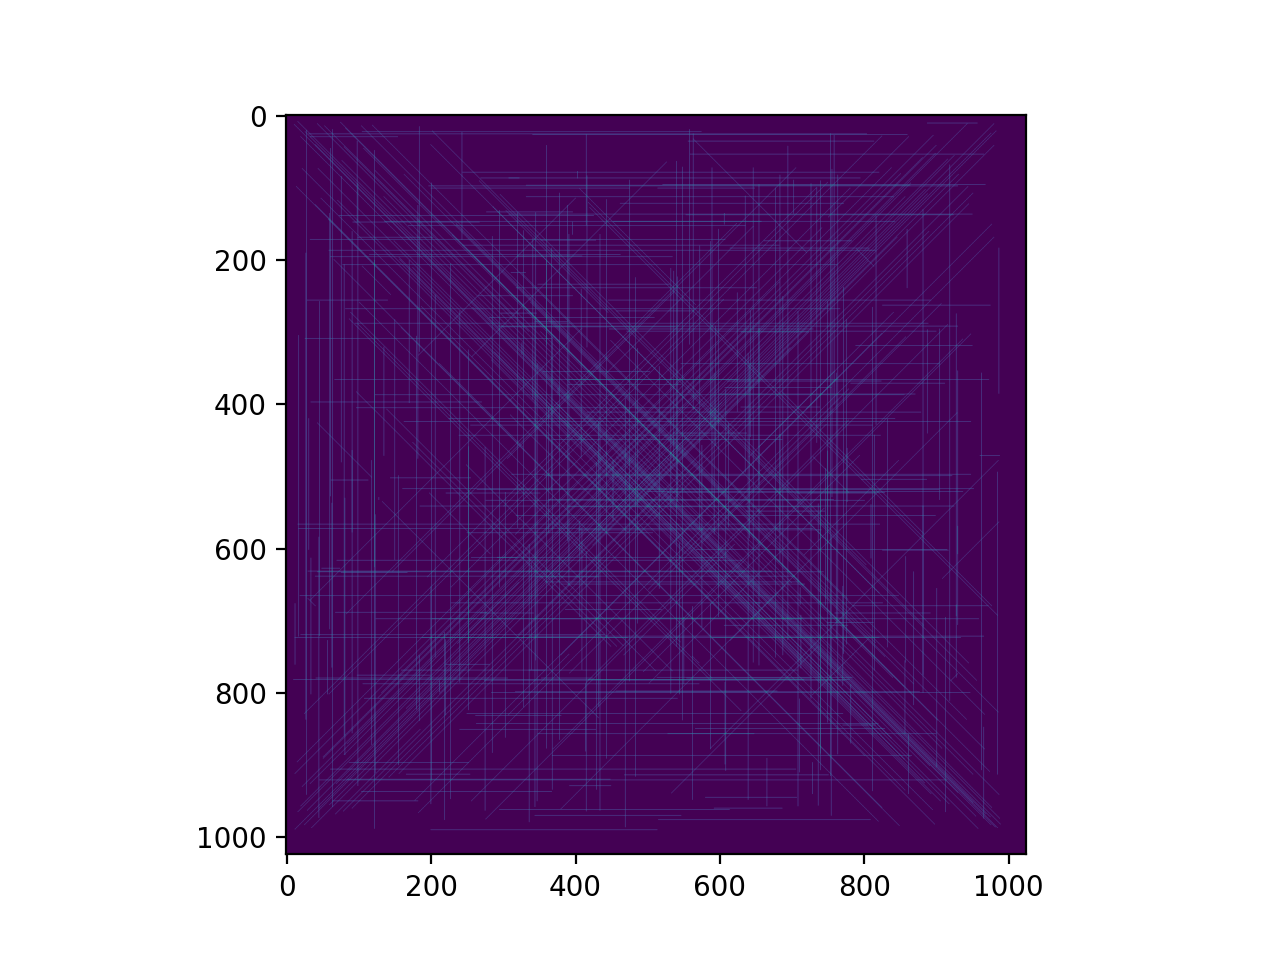

Sum greater than 1 20898


In [155]:
fn_prob = os.path.join(os.getcwd(), 'p5a_input.txt')


def line_parse(line_in):
    p1, p2 = line_in.strip().split('->')
    p1s = p1.split(',')
    p2s = p2.split(',')
    xypts = np.zeros(4, dtype='int')
    xypts[0] = int(p1s[0].strip())
    xypts[1] = int(p1s[1].strip())
    xypts[2] = int(p2s[0].strip())
    xypts[3] = int(p2s[1].strip())
    
    return xypts
    
ln1 = '541,808 -> 108,808\n'

xtest = line_parse(ln1)

print(xtest)


with open(fn_prob) as fid:
    lns = fid.readlines()



tvals = ['0,9 -> 5,9','8,0 -> 0,8','9,4 -> 3,4','2,2 -> 2,1','7,0 -> 7,4','6,4 -> 2,0',
         '0,9 -> 2,9','3,4 -> 1,4','0,0 -> 8,8','5,5 -> 8,2']

nvals = len(lns)
allpints = np.zeros((nvals, 4), dtype='int')


for iv in range(nvals):
    allpints[iv, :] = line_parse(lns[iv])
print('maxes')
print(allpints.max(axis=0))
nz = 1024
zz = np.zeros((nz,nz), dtype='int')
prnt = False
for iv in range(nvals):
    if allpints[iv, 0] == allpints[iv, 2]:
        #print('Vertical') 
        mn = np.minimum(allpints[iv,1], allpints[iv,3])
        mx = np.maximum(allpints[iv,1], allpints[iv,3])
        
        for ic in range(mn, mx+1):
            zz[allpints[iv, 0], ic] += 1
            if prnt:
                print('\t {}, {}'.format(allpints[iv, 0], ic))
        if prnt:
            print(allpints[iv, :])
            #prnt = False
    elif allpints[iv, 1] == allpints[iv, 3]:
        #print('Horizontal')
        mn = np.minimum(allpints[iv,0], allpints[iv,2])
        mx = np.maximum(allpints[iv,0], allpints[iv,2])
        
        for ir in range(mn, mx+1):
            zz[ir, allpints[iv, 1]] += 1
            if prnt:
                print('\t {}, {}'.format(ir, allpints[iv, 1]))
        if prnt:
            print(allpints[iv, :])
            #prnt = False
    else:
        num = np.abs(allpints[iv,2]-allpints[iv,0])+1
        mx = np.sign(allpints[iv,2]-allpints[iv,0])
        my = np.sign(allpints[iv,3]-allpints[iv,1])
        if prnt:
            print(allpints[iv, :])
        if mxx-mnx != mxy-mny:
            print('borken')
        for ir in range(num):
            zz[allpints[iv,0]+ir*mx, allpints[iv,1]+ir*my] += 1
            if prnt:
                print('\t {}, {}'.format(allpints[iv,0]+ir*mx, allpints[iv,1]+ir*my))
        if prnt:
            print(allpints[iv, :])
            #prnt = False
        
_=plt.figure()
_=plt.imshow(zz.T)

print('Sum greater than 1 {}'.format(np.sum(zz>1.5)))

In [152]:
print(zz.T)

[[1 0 0 0 0 0 0 1 1 0 0 0]
 [0 1 1 1 0 0 0 2 0 0 0 0]
 [0 0 2 0 1 0 1 1 1 0 0 0]
 [0 0 0 1 0 2 0 2 0 0 0 0]
 [0 1 1 2 1 1 3 2 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
1.1....11.
.111...2..
..2.1.111.
...1.2.2..
.112313211
...1.2....
..1...1...
.1.....1..
1.......1.
222111....

In [170]:
from tqdm.notebook import tqdm

# Problem 6

In [197]:
def age(d_in):
    d_out = d_in.copy()
    #deal with the zeros
    id0 = np.where(d_in == 0)[0]
    d_out -= 1
    if len(id0)>0:
        d_out[id0] = 6
        d_out = np.concatenate([d_out, 8*np.ones(len(id0), dtype = 'int')])
    
    return d_out

d6 = np.array([3,4,3,1,2], dtype='int')
d6 = np.array([5,3,2,2,1,1,4,1,5,5,1,3,1,5,1,2,1,4,1,2,1,2,1,4,2,4,1,5,
               1,3,5,4,3,3,1,4,1,3,4,4,1,5,4,3,3,2,5,1,1,3,1,4,3,2,2,3,
               1,3,1,3,1,5,3,5,1,3,1,4,2,1,4,1,5,5,5,2,4,2,1,4,1,3,5,5,
               1,4,1,1,4,2,2,1,3,1,1,1,1,3,4,1,4,1,1,1,4,4,4,1,3,1,3,4,
               1,4,1,2,2,2,5,4,1,3,1,2,1,4,1,4,5,2,4,5,4,1,2,1,4,2,2,2,
               1,3,5,2,5,1,1,4,5,4,3,2,4,1,5,2,2,5,1,4,1,5,1,3,5,1,2,1,
               1,1,5,4,4,5,1,1,1,4,1,3,3,5,5,1,5,2,1,1,3,1,1,3,2,3,4,4,
               1,5,5,3,2,1,1,1,4,3,1,3,3,1,1,2,2,1,2,2,2,1,1,5,1,2,2,5,
               2,4,1,1,2,4,1,2,3,4,1,2,1,2,4,2,1,1,5,3,1,4,4,4,1,5,2,3,
               4,4,1,5,1,2,2,4,1,1,2,1,1,1,1,5,1,3,3,1,1,1,1,4,1,2,2,5,
               1,2,1,3,4,1,3,4,3,3,1,1,5,5,5,2,4,3,1,4], dtype='int')

pd6 = d6.copy()
print(d6)

dl = np.zeros(81, dtype = 'int')
dl[0] = len(d6)
for ii in tqdm(range(80)):
    d6 = age(d6)
    dl[1+ii] = len(d6)
# print(d6)
print(len(d6))


poly = np.polyfit(np.arange(81), np.log2(dl), 1)

print(poly)

print(dl[-1], 2**(np.polyval(poly, 80)))

[5 3 2 2 1 1 4 1 5 5 1 3 1 5 1 2 1 4 1 2 1 2 1 4 2 4 1 5 1 3 5 4 3 3 1 4 1
 3 4 4 1 5 4 3 3 2 5 1 1 3 1 4 3 2 2 3 1 3 1 3 1 5 3 5 1 3 1 4 2 1 4 1 5 5
 5 2 4 2 1 4 1 3 5 5 1 4 1 1 4 2 2 1 3 1 1 1 1 3 4 1 4 1 1 1 4 4 4 1 3 1 3
 4 1 4 1 2 2 2 5 4 1 3 1 2 1 4 1 4 5 2 4 5 4 1 2 1 4 2 2 2 1 3 5 2 5 1 1 4
 5 4 3 2 4 1 5 2 2 5 1 4 1 5 1 3 5 1 2 1 1 1 5 4 4 5 1 1 1 4 1 3 3 5 5 1 5
 2 1 1 3 1 1 3 2 3 4 4 1 5 5 3 2 1 1 1 4 3 1 3 3 1 1 2 2 1 2 2 2 1 1 5 1 2
 2 5 2 4 1 1 2 4 1 2 3 4 1 2 1 2 4 2 1 1 5 3 1 4 4 4 1 5 2 3 4 4 1 5 1 2 2
 4 1 1 2 1 1 1 1 5 1 3 3 1 1 1 1 4 1 2 2 5 1 2 1 3 4 1 3 4 3 3 1 1 5 5 5 2
 4 3 1 4]


  0%|          | 0/80 [00:00<?, ?it/s]

359999
[0.12593616 8.37849132]
359999 358940.16246179893


In [204]:
ctem = []
for ii in range(9):
    ctem.append(int(0))
#pd6 = np.array([3,4,3,1,2], dtype='int')
for ii in range(9):
    ctem[ii] = int(np.sum(pd6 == ii))
print(ctem)
gm = 8*(64-7)
for gen_i in range(gm):
    eights = ctem[0]
    ctem[:8] = ctem[1:]
    ctem[6]+=eights
    ctem[8] = eights
    if gen_i+1 in [10, 20, 80, 256, gm]:
        print('generation {} has {} fish, bits {:.1f}'.format(gen_i+1, np.sum(ctem), np.log2(np.sum(ctem))))

[0, 109, 52, 43, 54, 42, 0, 0, 0]
generation 10 has 761 fish, bits 9.6
generation 20 has 2017 fish, bits 11.0
generation 80 has 359999 fish, bits 18.5
generation 256 has 1631647919273 fish, bits 40.6
generation 456 has 4746456992659353953 fish, bits 62.0


In [186]:
np.log2(75327281071284)

46.09823768991039